### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("../data/fraud_transactions.csv")
df.head()

,transaction_id,user_id,transaction_amount,transaction_date,city,merchant_category,is_international,previous_failed_attempts,fraud_flag
0,100001,1051,127913,2025-12-06 16:00:23.239230,Bengaluru,Restaurant,0,0,0
1,100002,1092,184178,2025-04-01 16:00:23.239230,Mumbai,Grocery,0,0,0
2,100003,1014,95385,2025-05-22 16:00:23.239230,Chennai,Electronics,1,2,0
3,100004,1071,146510,2025-12-01 16:00:23.239230,Chennai,Clothing,0,5,0
4,100005,1060,199199,2026-01-25 16:00:23.239230,Hyderabad,Grocery,0,0,0


In [3]:
df.shape

(450, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   transaction_id            450 non-null    int64 
 1   user_id                   450 non-null    int64 
 2   transaction_amount        450 non-null    int64 
 3   transaction_date          450 non-null    object
 4   city                      450 non-null    object
 5   merchant_category         450 non-null    object
 6   is_international          450 non-null    int64 
 7   previous_failed_attempts  450 non-null    int64 
 8   fraud_flag                450 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 31.8+ KB


In [5]:
df.isnull().sum()

transaction_id              0
user_id                     0
transaction_amount          0
transaction_date            0
city                        0
merchant_category           0
is_international            0
previous_failed_attempts    0
fraud_flag                  0
dtype: int64

Text(0.5, 1.0, 'Fraud vs Non-Fraud Transactions')

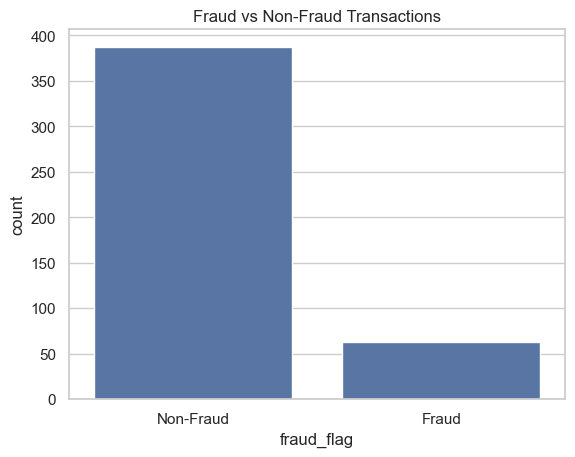

In [6]:
sns.countplot(x="fraud_flag", data=df)
plt.xticks([0,1], ["Non-Fraud", "Fraud"])
plt.title("Fraud vs Non-Fraud Transactions")

Text(0.5, 1.0, 'Fraud by City')

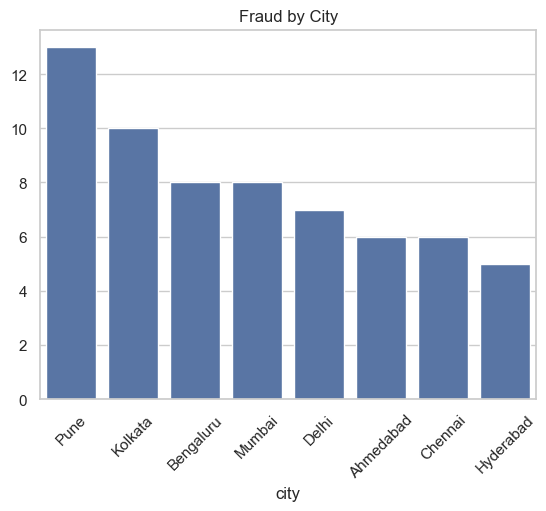

In [7]:
fraud_city = df[df["fraud_flag"] == 1]["city"].value_counts()

sns.barplot(x=fraud_city.index, y=fraud_city.values)
plt.xticks(rotation=45)
plt.title("Fraud by City")

Text(0.5, 1.0, 'Fraud by Merchant Category')

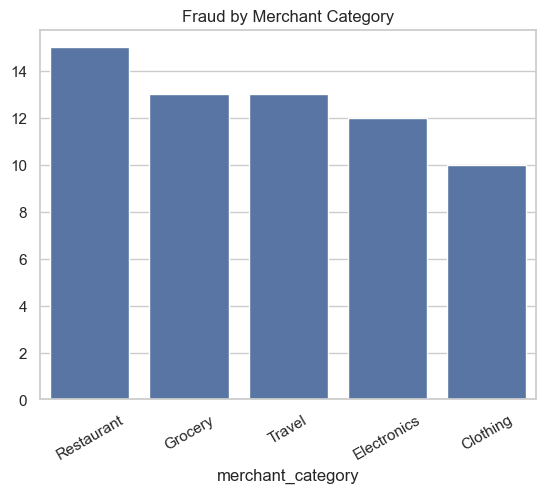

In [8]:
fraud_cat = df[df["fraud_flag"] == 1]["merchant_category"].value_counts()

sns.barplot(x=fraud_cat.index, y=fraud_cat.values)
plt.xticks(rotation=30)
plt.title("Fraud by Merchant Category")

Text(0.5, 1.0, 'Transaction Amount Distribution')

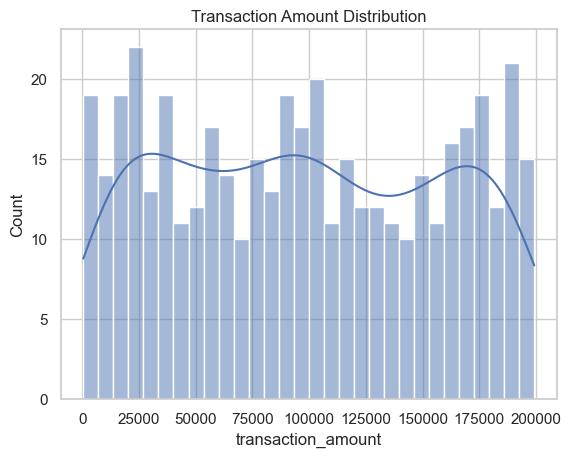

In [9]:
sns.histplot(df["transaction_amount"], bins=30, kde=True)
plt.title("Transaction Amount Distribution")

Text(0.5, 1.0, 'Correlation Heatmap')

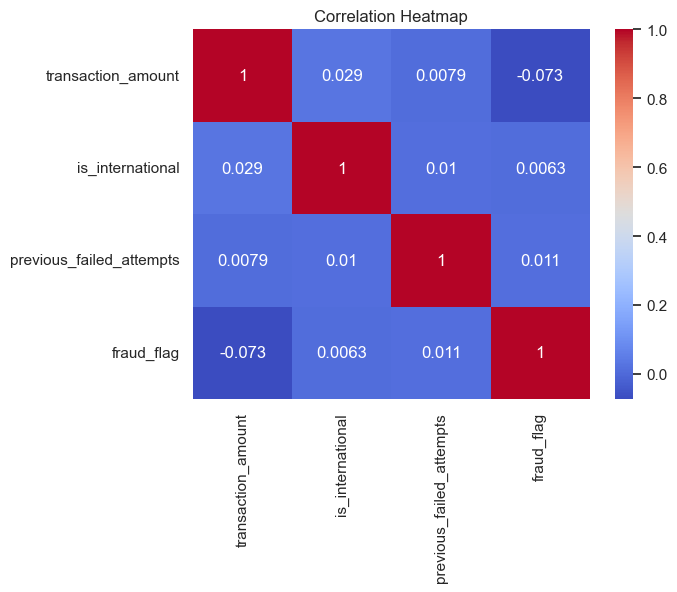

In [10]:
sns.heatmap(
    df[["transaction_amount", "is_international",
        "previous_failed_attempts", "fraud_flag"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap")

In [11]:
df.describe()

,transaction_id,user_id,transaction_amount,is_international,previous_failed_attempts,fraud_flag
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,100225.500000,1049.015556,98143.533333,0.184444,2.588889,0.140000
std,130.048068,29.410575,59578.925533,0.388278,1.706104,0.347373
min,100001.000000,1000.000000,504.000000,0.000000,0.000000,0.000000
25%,100113.250000,1023.250000,44664.250000,0.000000,1.000000,0.000000
50%,100225.500000,1049.500000,94831.000000,0.000000,3.000000,0.000000
75%,100337.750000,1074.000000,152377.000000,0.000000,4.000000,0.000000
max,100450.000000,1099.000000,199199.000000,1.000000,5.000000,1.000000


### Key Insights:
- Fraud transactions account for ~15% of total transactions.
- International transactions show higher fraud involvement.
- Electronics and Travel categories are more fraud-prone.
- Higher transaction amounts represent greater financial risk.